In [45]:
import h5py
import healpy as hp
import numpy as np
import os 

import matplotlib
%matplotlib inline

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

import sys
sys.path.append('../code')
import utils
import run_inference

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Use serif font (will automatically pick an available serif font)
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Bitstream Vera Sans']
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['figure.figsize'] = (16.0, 10.0)
matplotlib.rcParams['axes.unicode_minus'] = False

# Suppress font warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')

Here we assume the scripts have been run and data and results produced! Here is how to do that:

In gws-agn/code (note that all besdies make_mocks.py require running on a GPU):

Config Setup: (with parameters set as desired)
```
python generate_configs.py
python generate_configs.py --inference 
```

Data generation and processing:
```
python make_mocks.py --config ../configs/configs_data/config_data_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0.yaml (10 sec)
python pixelize_catalogs.py --config ../configs/configs_data/config_data_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0.yaml (6-12 min)
python generate_gwsamples.py --config ../configs/configs_data/config_data_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0.yaml (1.2 min)
```

Inference:
```
python run_inference.py --config ../configs/configs_inference/config_inference_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0_grid_nH030_nalphaagn30.yaml
python run_inference.py --config ../configs/configs_inference/config_inference_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0_mcmc_nw32_nsteps5000.yaml
```

## Load Config Files

We'll use the new config structure to determine which data products, likelihood grids, and MCMC results to load.

In [ ]:
import yaml
import os

# Load inference config
# You can modify this path to point to your inference config
# Example: config_inference_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0_grid_nH030_nalphaagn30.yaml
# Or: config_inference_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0_mcmc_nw32_nsteps5000.yaml
fn_config_inference = '../configs/configs_inference/config_inference_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0_grid_nH030_nalphaagn30.yaml'
print(fn_config_inference)

with open(fn_config_inference, 'r') as f:
    config_inference = yaml.safe_load(f)

# Load data config referenced in inference config
config_data_path = config_inference['fn_config_data']
print(config_data_path)

with open(config_data_path, 'r') as f:
    config_data = yaml.safe_load(f)

print("Inference config loaded:")
print(f"  Method: {config_inference['mode_inf']}")
print(f"  Output file: {config_inference['paths']['fn_inf']}")
print(f"\nData config loaded:")
print(f"  Tag cat: {config_data['paths']['tag_cat']}")
print(f"  Tag gw: {config_data['paths']['tag_gw']}")
print(f"  Dir mock: {config_data['paths']['dir_mock']}")

../configs/configs_inference/config_inference_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0_grid_nH030_nalphaagn30.yaml
../configs/configs_inference/config_inference_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0_grid_nH030_nalphaagn30.yaml
../configs/configs_data/config_data_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0.yaml
Inference config loaded:
  Method: grid
  Output file: ../results/inference/inference_results_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0_grid_nH030_nalphaagn30.h5

Data config loaded:
  Tag cat: _seed42_ratioNgalNagn1_bgal1.0_bagn1.0
  Tag gw: _fagn0.25_lambdaagn0.0
  Dir mock: ../data/mocks_glass/mock_seed42_ratioNgalNagn1_bgal1.0_bagn1.0/


## Visualize Data Products

Visualize the redshift distribution from the pixelated catalogs (only the redshift panel from the 4-panel plot).

In [13]:
# Get paths from config
dir_mock = config_data['paths']['dir_mock']
nside = config_data['mock_catalog']['nside']

# Construct file paths using new naming convention
galaxy_file = os.path.join(dir_mock, f'cat_gal_pixelated_nside{nside}.h5')
agn_file = os.path.join(dir_mock, f'cat_agn_pixelated_nside{nside}.h5')

print(f"Loading catalogs from:")
print(f"  Galaxy file: {galaxy_file}")
print(f"  AGN file: {agn_file}")

# Load pixelated catalogs
with h5py.File(galaxy_file, 'r') as f:
    zgals = np.array(f['z'])
    ngals = np.array(f['n_in_pixel'])

with h5py.File(agn_file, 'r') as f:
    zagns = np.array(f['z'])
    nagns = np.array(f['n_in_pixel'])

print(f"\nGalaxy catalog:")
print(f"  Shape: {zgals.shape}")
print(f"  Total galaxies: {ngals.sum()}")
print(f"  Pixels with galaxies: {(ngals > 0).sum()}")

print(f"\nAGN catalog:")
print(f"  Shape: {zagns.shape}")
print(f"  Total AGN: {nagns.sum()}")
print(f"  Pixels with AGN: {(nagns > 0).sum()}")

Loading catalogs from:
  Galaxy file: ../data/mocks_glass/mock_seed42_ratioNgalNagn1_bgal1.0_bagn1.0/cat_gal_pixelated_nside256.h5
  AGN file: ../data/mocks_glass/mock_seed42_ratioNgalNagn1_bgal1.0_bagn1.0/cat_agn_pixelated_nside256.h5

Galaxy catalog:
  Shape: (786432, 10)
  Total galaxies: 1176983
  Pixels with galaxies: 609945

AGN catalog:
  Shape: (786432, 10)
  Total AGN: 1177354
  Pixels with AGN: 610458


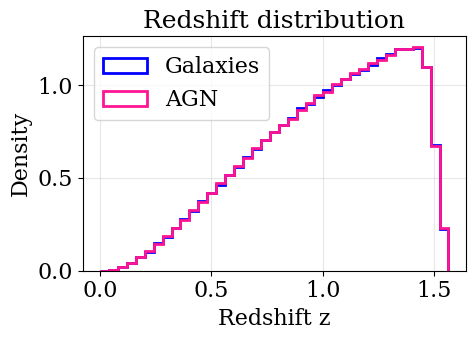

In [18]:
# Create visualization - only redshift panel (from 4-panel plot)
fig, ax = plt.subplots(1, 1, figsize=(5,3.5))

# Increase font sizes
fontsize = 16
title_fontsize = 18

# Colors
color_gal = 'blue'
color_agn = 'deeppink'

# Extract valid redshifts (not NaN)
valid_zgals = zgals[~np.isnan(zgals)]
valid_zagns = zagns[~np.isnan(zagns)]
bins = np.linspace(0, np.max(np.concatenate([valid_zgals, valid_zagns])), 40)

ax.hist(valid_zgals, bins=bins, alpha=1, label='Galaxies', color=color_gal, histtype='step', density=True, linewidth=2)
ax.hist(valid_zagns, bins=bins, alpha=1, label='AGN', color=color_agn, histtype='step', density=True, linewidth=2)

ax.set_xlabel('Redshift z', fontsize=fontsize)
ax.set_ylabel('Density', fontsize=fontsize)
ax.set_title('Redshift distribution', fontsize=title_fontsize)
ax.legend(fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

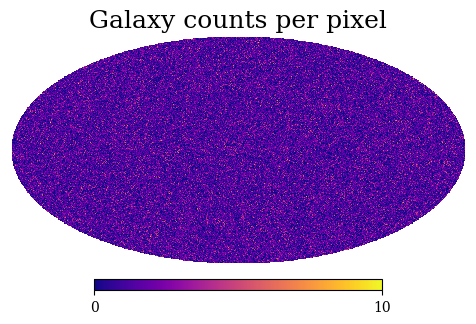

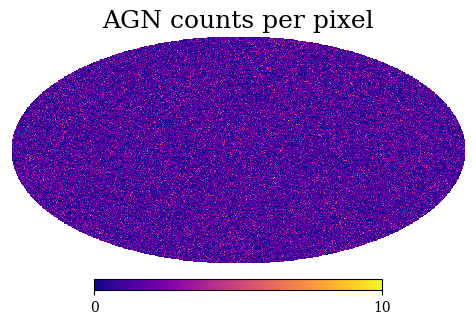

In [20]:
# Sky maps with plasma colormap for cat_pixelated
npix = hp.nside2npix(nside)
gal_map = np.zeros(npix)
gal_map[:len(ngals)] = ngals
agn_map = np.zeros(npix)
agn_map[:len(nagns)] = nagns

figsize = (6, 3)
# Sky map: Galaxy counts (plasma colormap)
fig = plt.figure(figsize=figsize)
hp.mollview(gal_map, title='Galaxy counts per pixel', cmap='plasma', 
            min=0, max=ngals.max(), fig=fig)
plt.title('Galaxy counts per pixel', fontsize=18)
plt.show()

# Sky map: AGN counts (plasma colormap)
fig = plt.figure(figsize=figsize)
hp.mollview(agn_map, title='AGN counts per pixel', cmap='plasma', 
            min=0, max=nagns.max(), fig=fig)
plt.title('AGN counts per pixel', fontsize=18)
plt.show()

## GW Events and Samples on the Sky

Load and visualize GW events (true injected positions) and their samples on the sky.

In [ ]:
# Settings for plotting
n_events_plot = 1000  # Number of events to plot (None for all)
n_samples_per_event = 100  # Number of samples per event to plot (None for all)

print(f"Plotting settings:")
print(f"  n_events: {n_events_plot if n_events_plot is not None else 'all'}")
print(f"  n_samples_per_event: {n_samples_per_event if n_samples_per_event is not None else 'all'}")

Plotting settings:
  n_events: 100
  n_samples_per_event: 100


In [25]:
# Load GW samples from gwsamples file
import generate_gwsamples

# Get GW file path directly from config
fn_gw = os.path.join(dir_mock, config_data['paths']['name_gwsamples'])

# Handle relative paths
if not os.path.isabs(fn_gw):
    project_root = os.path.dirname(os.path.dirname(os.path.abspath('')))
    fn_gw = os.path.normpath(os.path.join(project_root, fn_gw))

print(f"Loading GW samples from: {fn_gw}")

# Load GW samples (returns separate arrays for galaxies and AGNs)
ra_gal_samples, dec_gal_samples, dL_gal, _, _, \
ra_agn_samples, dec_agn_samples, dL_agn, _, _ = generate_gwsamples.load_samples(
    fn_gw, N_samples_gw=n_samples_per_event
)

# Concatenate galaxies and AGNs (galaxies first, then AGNs - no shuffling)
ra_samples = np.concatenate([ra_gal_samples, ra_agn_samples], axis=0)
dec_samples = np.concatenate([dec_gal_samples, dec_agn_samples], axis=0)

# Select number of events if specified
if n_events_plot is not None:
    ra_samples = ra_samples[:n_events_plot]
    dec_samples = dec_samples[:n_events_plot]

print(f"Loaded {len(ra_samples)} GW events with samples")
print(f"  Samples shape per event: {ra_samples.shape[1] if ra_samples.ndim == 2 else 'N/A'}")
print(f"  RA range: [{np.degrees(ra_samples.min()):.1f}°, {np.degrees(ra_samples.max()):.1f}°]")
print(f"  Dec range: [{np.degrees(dec_samples.min()):.1f}°, {np.degrees(dec_samples.max()):.1f}°]")

Loading GW samples from: ../data/mocks_glass/mock_seed42_ratioNgalNagn1_bgal1.0_bagn1.0/gwsamples_fagn0.25_lambdaagn0.0.h5
Loading GW samples from ../data/mocks_glass/mock_seed42_ratioNgalNagn1_bgal1.0_bagn1.0/gwsamples_fagn0.25_lambdaagn0.0.h5 (N_samples_gw=100)
Loaded 100 GW events with samples
  Samples shape per event: 100
  RA range: [0.0°, 360.0°]
  Dec range: [-90.0°, 81.9°]


In [28]:
# Load true injected GW event positions from mock catalog
# Get file paths directly from config
fn_cat = os.path.join(dir_mock, config_data['paths']['name_cat'])
fn_gw_indices = os.path.join(dir_mock, config_data['paths']['name_gw'])

# Handle relative paths
if not os.path.isabs(fn_cat):
    project_root = os.path.dirname(os.path.dirname(os.path.abspath('')))
    fn_cat = os.path.normpath(os.path.join(project_root, fn_cat))
    fn_gw_indices = os.path.normpath(os.path.join(project_root, fn_gw_indices))

print(f"Loading true injected positions from:")
print(f"  Mock catalog: {fn_cat}")
print(f"  GW indices: {fn_gw_indices}")

# Load mock catalog
with h5py.File(fn_cat, 'r') as f:
    ra_gal_all = np.asarray(f['ra_gal']) * np.pi / 180  # Convert to radians
    dec_gal_all = np.asarray(f['dec_gal']) * np.pi / 180
    ra_agn_all = np.asarray(f['ra_agn']) * np.pi / 180
    dec_agn_all = np.asarray(f['dec_agn']) * np.pi / 180

# Load GW indices
with h5py.File(fn_gw_indices, 'r') as f:
    i_gw_gal = np.asarray(f['i_gw_gal'])
    i_gw_agn = np.asarray(f['i_gw_agn'])

# Extract true injected positions
ra_gal_events = ra_gal_all[i_gw_gal]
dec_gal_events = dec_gal_all[i_gw_gal]
ra_agn_events = ra_agn_all[i_gw_agn]
dec_agn_events = dec_agn_all[i_gw_agn]

# Combine all true injected positions (galaxies first, then AGNs, matching samples order)
ra_events = np.concatenate([ra_gal_events, ra_agn_events])
dec_events = np.concatenate([dec_gal_events, dec_agn_events])

# Select number of events if specified (must match samples selection)
if n_events_plot is not None:
    ra_events = ra_events[:n_events_plot]
    dec_events = dec_events[:n_events_plot]

print(f"Loaded {len(ra_events)} true injected GW event positions")

Loading true injected positions from:
  Mock catalog: ../data/mocks_glass/mock_seed42_ratioNgalNagn1_bgal1.0_bagn1.0/mock_catalog.h5
  GW indices: ../data/mocks_glass/mock_seed42_ratioNgalNagn1_bgal1.0_bagn1.0/gws_fagn0.25_lambdaagn0.0.h5
Loaded 100 true injected GW event positions


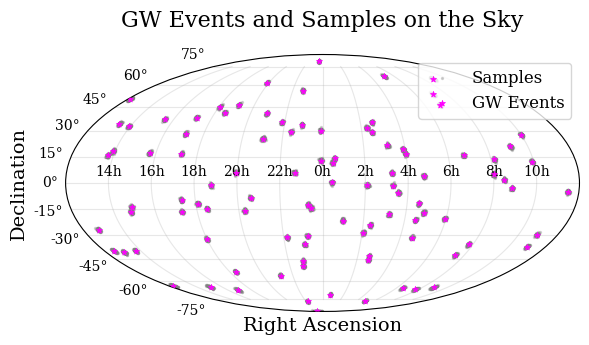

In [31]:
# Prepare data for plotting
# Flatten samples to 1D array for plotting
if ra_samples.ndim == 2:
    ra_all_samples = ra_samples.flatten()
    dec_all_samples = dec_samples.flatten()
else:
    ra_all_samples = ra_samples
    dec_all_samples = dec_samples

# Convert RA from [0, 2π] to [-π, π] for Mollweide projection
ra_events_plot = np.where(ra_events > np.pi, ra_events - 2*np.pi, ra_events)
ra_all_samples_plot = np.where(ra_all_samples > np.pi, ra_all_samples - 2*np.pi, ra_all_samples)

# Plot scatter plot of GW events and samples on the sky with Mollweide projection
figsize = (6, 4)
fig, ax = plt.subplots(figsize=figsize, subplot_kw={'projection': 'mollweide'})

# Plot all samples as small points
ax.scatter(ra_all_samples_plot, dec_all_samples, c='gray', s=2, alpha=0.3, 
           label='Samples', rasterized=True)

# Plot GW events as big stars
ax.scatter(ra_events_plot, dec_events, c='magenta', s=20, marker='*', 
           edgecolors=None, linewidths=0.5, label='GW Events', zorder=10)

ax.set_xlabel('Right Ascension', fontsize=14)
ax.set_ylabel('Declination', fontsize=14)
ax.set_title('GW Events and Samples on the Sky', fontsize=16, pad=20)
ax.legend(fontsize=12, loc='upper right')
ax.grid(True, alpha=0.3)

# Set tick labels to show hours
ax.set_xticklabels(['14h', '16h', '18h', '20h', '22h', '0h', '2h', '4h', '6h', '8h', '10h'])

plt.tight_layout()
plt.show()

### GW Samples

### 2D Likelihood on (f_agn, lambda_agn)

Compute and plot 2D likelihood on (f_agn, lambda_agn) by mapping from the marginalized alpha_agn distribution.

## Load and Plot Likelihood Grid

Load the likelihood grid results if available (for grid method).

Loading likelihood grid from: ../results/inference/inference_results_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0_grid_nH030_nalphaagn30.h5
Loading likelihood grid from ../results/inference/inference_results_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0_grid_nH030_nalphaagn30.h5
Loaded likelihood grid with shape: (30, 30)
H0 grid: 30 points from 50.0 to 100.0
alpha_agn grid: 30 points from 0.000 to 1.000

Truth values (from config):
  H0: 67.74 km/s/Mpc
  alpha_agn: 0.250


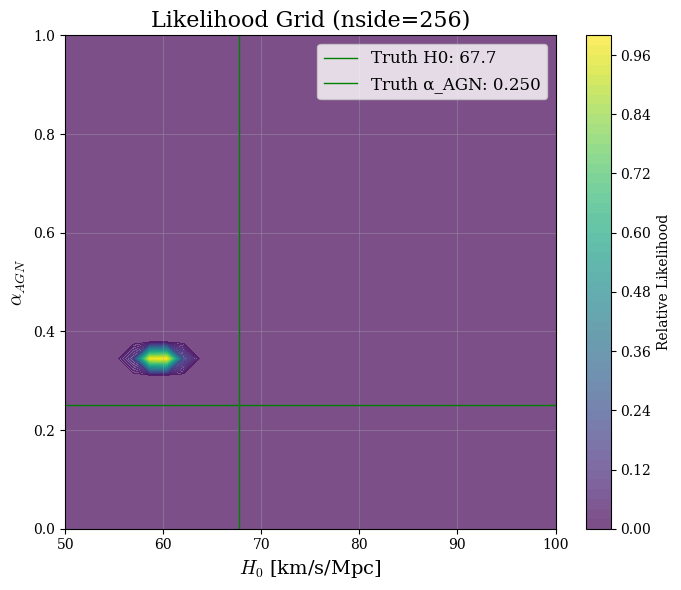

In [47]:
# Get output file from config
fn_inf = config_inference['paths']['fn_inf']

print(f"Loading likelihood grid from: {fn_inf}")

# Load likelihood grid
likelihood_results = run_inference.load_likelihood_grid(fn_inf)

# Extract data
log_likelihood_grid = likelihood_results['log_likelihood_grid']
H0_grid = likelihood_results['H0_grid']
alpha_agn_grid = likelihood_results['alpha_agn_grid']

print(f"Loaded likelihood grid with shape: {log_likelihood_grid.shape}")
print(f"H0 grid: {len(H0_grid)} points from {H0_grid.min():.1f} to {H0_grid.max():.1f}")
print(f"alpha_agn grid: {len(alpha_agn_grid)} points from {alpha_agn_grid.min():.3f} to {alpha_agn_grid.max():.3f}")

# Get truth values from config
truth_H0 = config_data['cosmology']['H0']
truth_f_agn = config_data['gw_injection']['f_agn']
truth_lambda_agn = config_data['gw_injection']['lambda_agn']

# Calculate truth alpha_agn from f_agn and lambda_agn
# Need N_gal and N_agn - get from pixelated catalogs
N_gal_truth = int(ngals.sum())
N_agn_truth = int(nagns.sum())
_, truth_alpha_agn = utils.compute_gw_host_fractions(N_gal_truth, N_agn_truth, truth_f_agn, lambda_agn=truth_lambda_agn)

print(f"\nTruth values (from config):")
print(f"  H0: {truth_H0:.2f} km/s/Mpc")
print(f"  alpha_agn: {truth_alpha_agn:.3f}")

# Create meshgrid for plotting
H0_mesh, alpha_agn_mesh = np.meshgrid(H0_grid, alpha_agn_grid)

# Plot likelihood grid as contour plot
fig, ax = plt.subplots(figsize=(7,6))

# Convert to likelihood (relative, normalized)
likelihood_grid = np.exp(log_likelihood_grid - np.nanmax(log_likelihood_grid))

# Fill contours
im = ax.contourf(H0_mesh, alpha_agn_mesh, likelihood_grid, levels=50, cmap='viridis', alpha=0.7)
plt.colorbar(im, ax=ax, label='Relative Likelihood')

# Add green truth lines
ax.axvline(truth_H0, color='green', linestyle='-', linewidth=1, label=f'Truth H0: {truth_H0:.1f}')
ax.axhline(truth_alpha_agn, color='green', linestyle='-', linewidth=1, label=f'Truth α_AGN: {truth_alpha_agn:.3f}')

ax.set_xlabel(r'$H_0$ [km/s/Mpc]', fontsize=14)
ax.set_ylabel(r'$\alpha_{AGN}$', fontsize=14)
ax.set_title(f'Likelihood Grid (nside={nside})', fontsize=16)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 1D Marginal Densities and Derived Parameters

Compute and plot 1D marginal densities for H0 and alpha_agn, and compute f_agn and lambda_agn from alpha_agn.


In [ ]:
# Compute 1D marginal densities by integrating over the other parameter
# Convert log likelihood to likelihood (relative, normalized)
likelihood_grid = np.exp(log_likelihood_grid - np.nanmax(log_likelihood_grid))

# Marginalize over alpha_agn to get H0 density
# Sum over rows (alpha_agn dimension)
H0_marginal = np.sum(likelihood_grid, axis=0)
H0_marginal = H0_marginal / np.trapz(H0_marginal, H0_grid)  # Normalize

# Marginalize over H0 to get alpha_agn density
# Sum over columns (H0 dimension)
alpha_agn_marginal = np.sum(likelihood_grid, axis=1)
alpha_agn_marginal = alpha_agn_marginal / np.trapz(alpha_agn_marginal, alpha_agn_grid)  # Normalize

print("Computed 1D marginal densities")
print(f"  H0 marginal shape: {H0_marginal.shape}")
print(f"  alpha_agn marginal shape: {alpha_agn_marginal.shape}")

Computed 1D marginal densities
  H0 marginal shape: (30,)
  alpha_agn marginal shape: (30,)


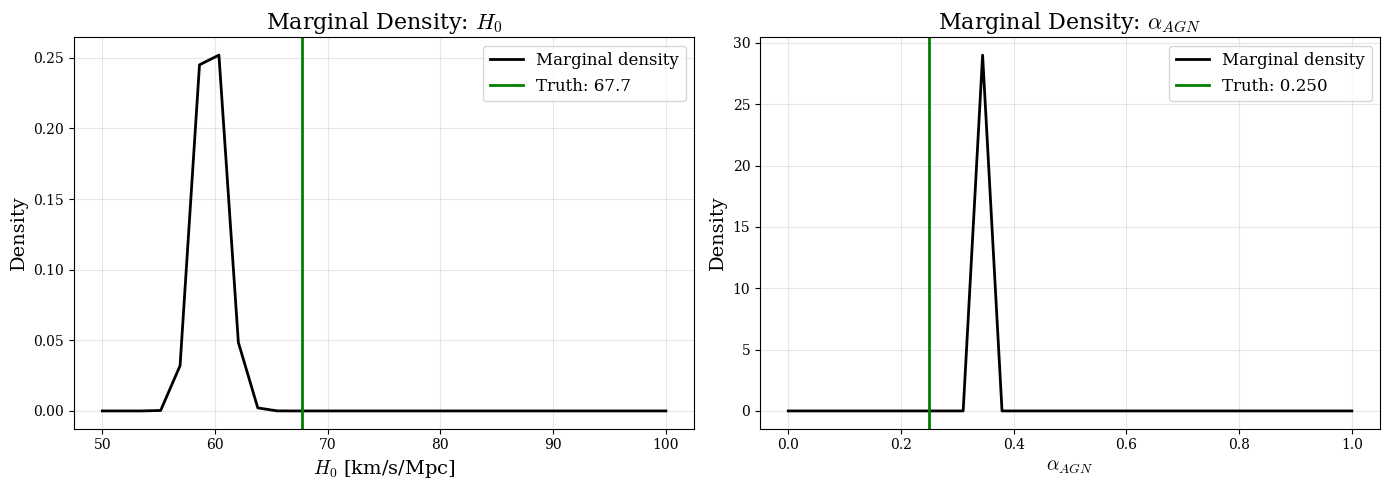

In [67]:
# Plot 1D marginal densities
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# H0 marginal density
axes[0].plot(H0_grid, H0_marginal, 'k-', linewidth=2, label='Marginal density')
axes[0].axvline(truth_H0, color='green', linestyle='-', linewidth=2, label=f'Truth: {truth_H0:.1f}')
axes[0].set_xlabel(r'$H_0$ [km/s/Mpc]', fontsize=14)
axes[0].set_ylabel('Density', fontsize=14)
axes[0].set_title('Marginal Density: $H_0$', fontsize=16)
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=12)

# alpha_agn marginal density
axes[1].plot(alpha_agn_grid, alpha_agn_marginal, 'k-', linewidth=2, label='Marginal density')
axes[1].axvline(truth_alpha_agn, color='green', linestyle='-', linewidth=2, label=f'Truth: {truth_alpha_agn:.3f}')
axes[1].set_xlabel(r'$\alpha_{AGN}$', fontsize=14)
axes[1].set_ylabel('Density', fontsize=14)
axes[1].set_title('Marginal Density: $\\alpha_{AGN}$', fontsize=16)
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=12)

plt.tight_layout()
plt.show()


N_gal = 1176983, N_agn = 1177354

Marginalized distributions:
f_agn: mean = 0.1849, std = 0.1003, median = 0.1716
lambda_agn: mean = 0.1849, std = 0.1003, median = 0.1716


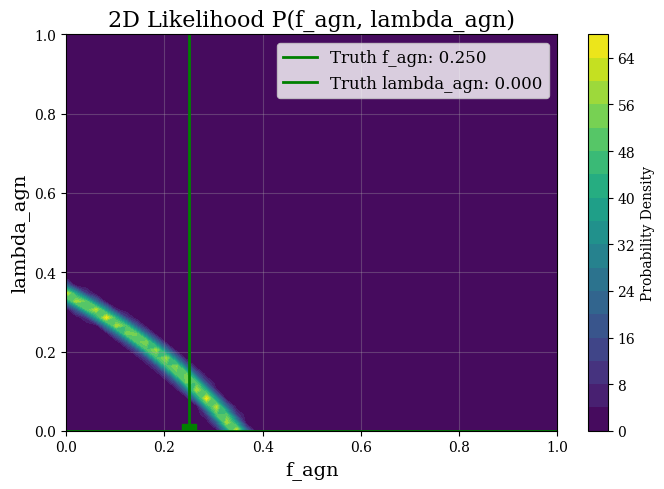

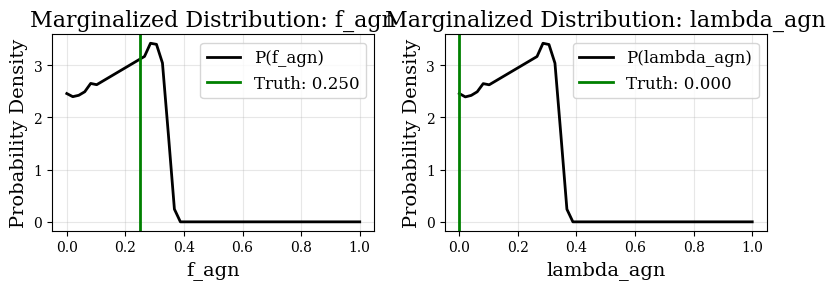

In [66]:
# Solve for f_agn and lambda_agn from likelihood grid
# The likelihood grid is on (H0, alpha_agn)
# We need to convert the marginalized alpha_agn distribution to distributions for (f_agn, lambda_agn)

import sys
sys.path.append('../code')
from scipy.interpolate import interp1d

# Get N_gal and N_agn from mock catalog
fn_cat = os.path.join(dir_mock, config_data['paths']['name_cat'])
with h5py.File(fn_cat, 'r') as f:
    N_gal = int(f.attrs['n_gal'])
    N_agn = int(f.attrs['n_agn'])

print(f"N_gal = {N_gal}, N_agn = {N_agn}")

# Step 1: We already have the marginalized likelihood on alpha_agn (alpha_agn_marginal)
# Create interpolation function for likelihood on alpha_agn
likelihood_alpha_agn_interp = interp1d(alpha_agn_grid, alpha_agn_marginal, kind='linear', 
                                       bounds_error=False, fill_value=0.0)

# Step 2: Create grid of (f_agn, lambda_agn) values
n_fagn = 50
n_lambda = 50
f_agn_grid = np.linspace(0, 1, n_fagn)
lambda_agn_grid = np.linspace(0, 1, n_lambda)

# Step 3: For each (f_agn, lambda_agn) pair, compute corresponding alpha_agn value
# and get likelihood from interpolation
likelihood_fagn_lambda = np.zeros((n_fagn, n_lambda))

for i, f_agn_val in enumerate(f_agn_grid):
    for j, lambda_agn_val in enumerate(lambda_agn_grid):
        # Compute the alpha_agn for this (f_agn, lambda_agn) pair
        _, alpha_agn_val = utils.compute_gw_host_fractions(N_gal, N_agn, f_agn_val, lambda_agn=lambda_agn_val)
        
        # Get likelihood from interpolation
        likelihood_fagn_lambda[i, j] = likelihood_alpha_agn_interp(alpha_agn_val)

# Normalize the 2D likelihood
likelihood_fagn_lambda = likelihood_fagn_lambda / np.trapz(np.trapz(likelihood_fagn_lambda, 
                                                                     lambda_agn_grid, axis=1), 
                                                           f_agn_grid)

# Step 4: Marginalize to get 1D distributions
# P(f_agn) = integral P(f_agn, lambda_agn) d(lambda_agn)
likelihood_fagn = np.trapz(likelihood_fagn_lambda, lambda_agn_grid, axis=1)
likelihood_fagn = likelihood_fagn / np.trapz(likelihood_fagn, f_agn_grid)  # Normalize

# P(lambda_agn) = integral P(f_agn, lambda_agn) d(f_agn)
likelihood_lambda = np.trapz(likelihood_fagn_lambda, f_agn_grid, axis=0)
likelihood_lambda = likelihood_lambda / np.trapz(likelihood_lambda, lambda_agn_grid)  # Normalize

# Compute summary statistics
# For f_agn
fagn_mean = np.trapz(f_agn_grid * likelihood_fagn, f_agn_grid)
fagn_std = np.sqrt(np.trapz((f_agn_grid - fagn_mean)**2 * likelihood_fagn, f_agn_grid))
# Find median
fagn_cdf = np.cumsum(likelihood_fagn) * (f_agn_grid[1] - f_agn_grid[0])
fagn_median = np.interp(0.5, fagn_cdf, f_agn_grid)

# For lambda_agn
lambda_mean = np.trapz(lambda_agn_grid * likelihood_lambda, lambda_agn_grid)
lambda_std = np.sqrt(np.trapz((lambda_agn_grid - lambda_mean)**2 * likelihood_lambda, lambda_agn_grid))
# Find median
lambda_cdf = np.cumsum(likelihood_lambda) * (lambda_agn_grid[1] - lambda_agn_grid[0])
lambda_median = np.interp(0.5, lambda_cdf, lambda_agn_grid)

print(f"\nMarginalized distributions:")
print(f"f_agn: mean = {fagn_mean:.4f}, std = {fagn_std:.4f}, median = {fagn_median:.4f}")
print(f"lambda_agn: mean = {lambda_mean:.4f}, std = {lambda_std:.4f}, median = {lambda_median:.4f}")

# Get truth values from config (if not already defined)
if 'truth_f_agn' not in locals():
    truth_f_agn = config_data['gw_injection']['f_agn']
    truth_lambda_agn = config_data['gw_injection']['lambda_agn']

# Plot results - split into 2 separate figures

# Figure 1: 2D likelihood
fig1, ax1 = plt.subplots(1, 1, figsize=(7, 5))
im = ax1.contourf(f_agn_grid, lambda_agn_grid, likelihood_fagn_lambda.T, levels=20, cmap='viridis')
# Add truth values as green lines
ax1.axvline(truth_f_agn, color='green', linestyle='-', linewidth=2, label=f'Truth f_agn: {truth_f_agn:.3f}')
ax1.axhline(truth_lambda_agn, color='green', linestyle='-', linewidth=2, label=f'Truth lambda_agn: {truth_lambda_agn:.3f}')
ax1.scatter(truth_f_agn, truth_lambda_agn, color='green', marker='s', s=100)
ax1.set_xlabel('f_agn', fontsize=14)
ax1.set_ylabel('lambda_agn', fontsize=14)
ax1.set_title('2D Likelihood P(f_agn, lambda_agn)', fontsize=16)
ax1.legend(fontsize=12)
ax1.grid(alpha=0.3)
plt.colorbar(im, ax=ax1, label='Probability Density')
plt.tight_layout()
plt.show()

# Figure 2: 1D marginalized distributions
fig2, axes = plt.subplots(1, 2, figsize=(8, 3))

# Plot marginalized f_agn distribution
axes[0].plot(f_agn_grid, likelihood_fagn, 'k-', linewidth=2, label='P(f_agn)')
# Add truth value
axes[0].axvline(truth_f_agn, color='green', linestyle='-', linewidth=2, label=f'Truth: {truth_f_agn:.3f}')
axes[0].set_xlabel('f_agn', fontsize=14)
axes[0].set_ylabel('Probability Density', fontsize=14)
axes[0].set_title('Marginalized Distribution: f_agn', fontsize=16)
axes[0].legend(fontsize=12)
axes[0].grid(alpha=0.3)

# Plot marginalized lambda_agn distribution
axes[1].plot(lambda_agn_grid, likelihood_lambda, 'k-', linewidth=2, label='P(lambda_agn)')
# Add truth value
axes[1].axvline(truth_lambda_agn, color='green', linestyle='-', linewidth=2, label=f'Truth: {truth_lambda_agn:.3f}')
axes[1].set_xlabel('lambda_agn', fontsize=14)
axes[1].set_ylabel('Probability Density', fontsize=14)
axes[1].set_title('Marginalized Distribution: lambda_agn', fontsize=16)
axes[1].legend(fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Load and Plot MCMC Results

Load the MCMC results if available (for mcmc method).

In [70]:
fn_config_inference = '../configs/configs_inference/config_inference_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0_mcmc_nw32_nsteps5000.yaml'
print(fn_config_inference)
with open(fn_config_inference, 'r') as f:
    config_inference = yaml.safe_load(f)

../configs/configs_inference/config_inference_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0_mcmc_nw32_nsteps5000.yaml


In [73]:
# Get output file from config
fn_inf = config_inference['paths']['fn_inf']

print(f"Loading MCMC results from: {fn_inf}")

# Load inference results
loaded_results = run_inference.load_inference_results(fn_inf)
run_inference.print_inference_summary(loaded_results)

# Access data
samples = loaded_results['posterior_samples']
mcmc_params = loaded_results.get('mcmc_params', {})
labels = mcmc_params.get('labels', ['H0', 'alpha_agn'])

print(f"\nPosterior samples shape: {samples.shape}")

# Get truth values from config
truth_H0 = config_data['cosmology']['H0']
truth_f_agn = config_data['gw_injection']['f_agn']
truth_lambda_agn = config_data['gw_injection']['lambda_agn']

# Calculate truth alpha_agn from f_agn and lambda_agn
# Need N_gal and N_agn - get from pixelated catalogs
N_gal_truth = int(ngals.sum())
N_agn_truth = int(nagns.sum())
_, truth_alpha_agn = utils.compute_gw_host_fractions(N_gal_truth, N_agn_truth, truth_f_agn, lambda_agn=truth_lambda_agn)

print(f"\nTruth values (from config):")
print(f"  H0: {truth_H0:.2f} km/s/Mpc")
print(f"  alpha_agn: {truth_alpha_agn:.3f}")

Loading MCMC results from: ../results/inference/inference_results_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0_mcmc_nw32_nsteps5000.h5
Loading inference results from ../results/inference/inference_results_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0_mcmc_nw32_nsteps5000.h5
Printing inference results summary
Inference Results Summary
Timestamp: 2025-12-11T23:40:21.575295
Number of samples: 128000
Number of parameters: 2

MCMC Parameters:
  H0: [50, 100]
  alpha_agn: [0, 1]

Config file: /global/u2/k/kstoreyf/gws-agn/configs/configs_inference/config_inference_seed42_ratioNgalNagn1_bgal1.0_bagn1.0_fagn0.25_lambdaagn0.0_mcmc_nw32_nsteps5000.yaml

Posterior Samples Shape: (128000, 2)
Parameter means:
  H0: 67.7152 ± 0.0496
  alpha_agn: 0.1893 ± 0.0248

Posterior samples shape: (128000, 2)

Truth values (from config):
  H0: 67.74 km/s/Mpc
  alpha_agn: 0.250


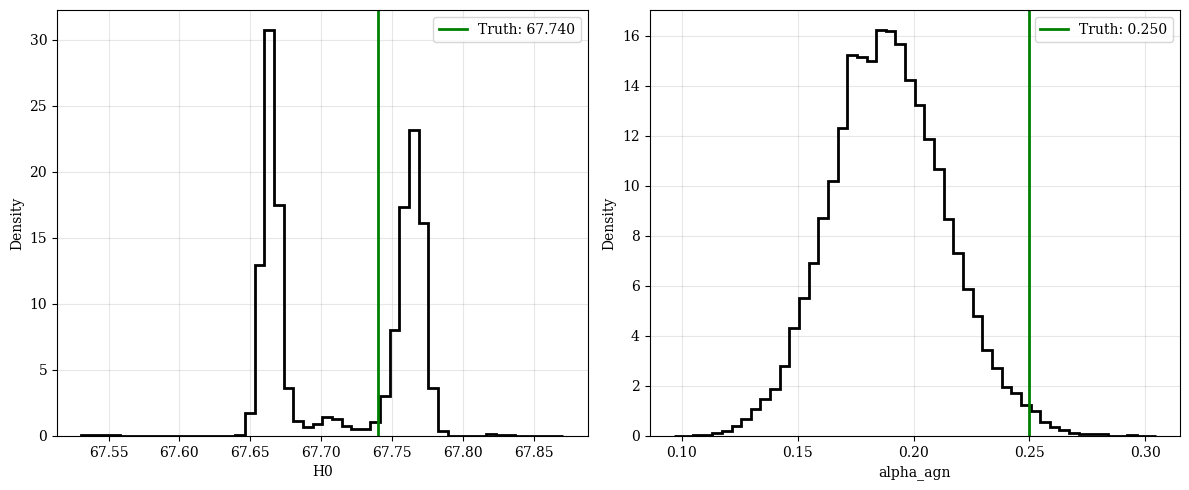

In [76]:
# Plot histograms for each parameter
n_params = samples.shape[1]
fig, axes = plt.subplots(1, n_params, figsize=(6*n_params, 5))

if n_params == 1:
    axes = [axes]

# Truth values array
truth_values = [truth_H0, truth_alpha_agn]

for i, (ax, label) in enumerate(zip(axes, labels)):
    ax.hist(samples[:, i], bins=50, density=True, lw=2, color='black', histtype='step')
    # Overplot truth value
    ax.axvline(truth_values[i], color='green', linestyle='-', linewidth=2,
               label=f'Truth: {truth_values[i]:.3f}')
    ax.set_xlabel(label)
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


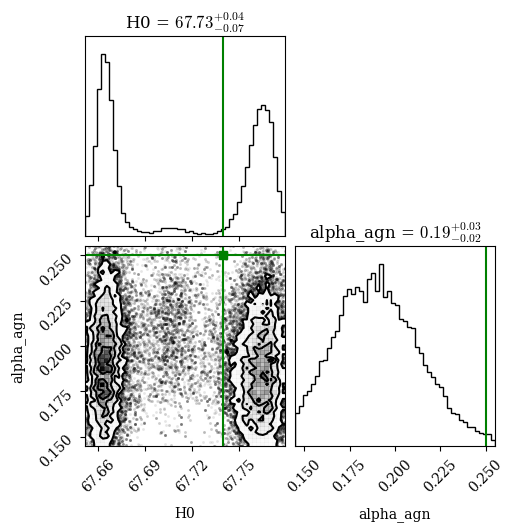

In [82]:
# Corner plot
import corner
import numpy as np

# Calculate ranges for each parameter that include truth values and majority of samples
ranges = []
buffer_factor = 0.05  # 5% buffer on each side

for i in range(samples.shape[1]):
    # Get the 5th and 95th percentiles to include majority of samples
    sample_min = np.percentile(samples[:, i], 5)
    sample_max = np.percentile(samples[:, i], 95)
    
    # Include truth value in range
    truth_val = truth_values[i]
    param_min = min(sample_min, truth_val)
    param_max = max(sample_max, truth_val)
    
    # Add buffer
    range_size = param_max - param_min
    param_min = param_min - buffer_factor * range_size
    param_max = param_max + buffer_factor * range_size
    
    ranges.append((param_min, param_max))

fig = corner.corner(samples, labels=labels, show_titles=True, 
                    title_kwargs={"fontsize": 12}, bins=50,
                    truths=truth_values, truth_color='green', 
                    truth_kwargs={'linestyle': '-', 'linewidth': 2},
                    range=ranges)
plt.show()
